In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
cd '/content/gdrive/MyDrive/AIML/LABS/Computer Vision/Project 2'

/content/gdrive/MyDrive/AIML/LABS/Computer Vision/Project 2


In [4]:
import cv2
import os
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import svm, metrics
from natsort import natsorted
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# from sklearn.grid_search import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, GridSearchCV

In [5]:
images_path = "/content/gdrive/MyDrive/AIML/LABS/Computer Vision/Project 2/training_images-20211126T092819Z-001.zip"

from zipfile import ZipFile
with ZipFile(images_path,'r') as zip:
  zip.extractall()

In [6]:
#PART- B
#1. Read/import images from folder ‘training_images’. 
paths = glob.glob("training_images/*")
label_names = [os.path.split(x)[-1] for x in paths]

print("Total labels: {}".format(len(label_names)))
print("Labels: {}".format(label_names))

Total labels: 1091
Labels: ['real_00947.jpg', 'real_01052.jpg', 'real_01042.jpg', 'real_00964.jpg', 'real_01053.jpg', 'real_00971.jpg', 'real_01057.jpg', 'real_01044.jpg', 'real_01041.jpg', 'real_01067.jpg', 'real_00969.jpg', 'real_00956.jpg', 'real_00975.jpg', 'real_01021.jpg', 'real_00945.jpg', 'real_01068.jpg', 'real_01062.jpg', 'real_01016.jpg', 'real_01065.jpg', 'real_01027.jpg', 'real_00961.jpg', 'real_01014.jpg', 'real_01010.jpg', 'real_00952.jpg', 'real_00951.jpg', 'real_00981.jpg', 'real_01050.jpg', 'real_00962.jpg', 'real_00995.jpg', 'real_01056.jpg', 'real_00977.jpg', 'real_00985.jpg', 'real_01005.jpg', 'real_01031.jpg', 'real_01008.jpg', 'real_01073.jpg', 'real_00978.jpg', 'real_01077.jpg', 'real_00984.jpg', 'real_01032.jpg', 'real_00943.jpg', 'real_01015.jpg', 'real_00970.jpg', 'real_01037.jpg', 'real_01080.jpg', 'real_00954.jpg', 'real_00967.jpg', 'real_01047.jpg', 'real_01039.jpg', 'real_01006.jpg', 'real_01075.jpg', 'real_01017.jpg', 'real_01079.jpg', 'real_01049.jpg', 

In [7]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [8]:
Train_Folder= "training_images"
from google.colab.patches import cv2_imshow

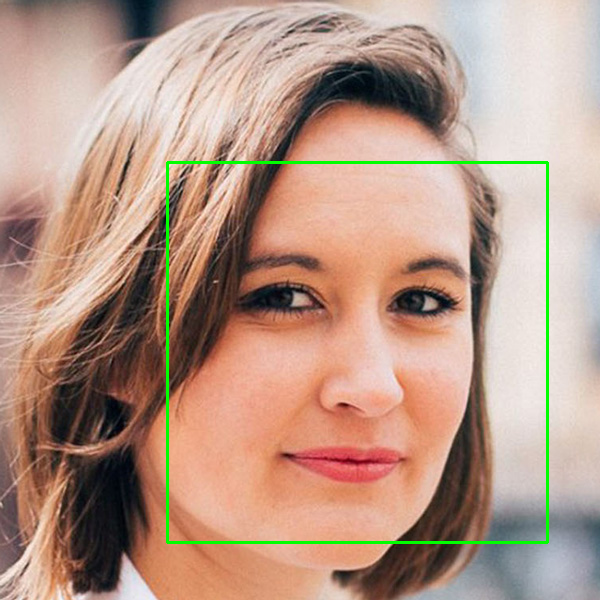

In [9]:
img = cv2.imread('training_images/real_01044.jpg')
# Converting image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Applying the face detection method on the grayscale image
faces_rect = face_cascade.detectMultiScale(gray_img, 1.1, 9)
  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
  
cv2_imshow(img)

In [10]:
from glob import glob
images = []
classes=[]
data=[]
missing=0
for class_folder_name in os.listdir(Train_Folder):
    class_folder_path = os.path.join(Train_Folder, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(class_folder_path):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missing value ignore it
          missing += 1
          continue
        gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
        faces_rect = face_cascade.detectMultiScale(gray, 1.1, 9)
        for (x, y, w, h) in faces_rect:
          cv2.rectangle(image_bgr, (x, y), (x+w, y+h), (0, 255, 0), 2)
          data.append([x, y, w, h, 1, class_label])
        images.append(image_bgr)
        
        classes.append(class_label)

In [11]:
#3) From the same loop above, extract metadata of the faces and write into a DataFrame
df = []
df = pd.DataFrame(data, columns=['x', 'y', 'w', 'h', 'Total_Faces', 'Image_Name'])
df

x    y    w    h  Total_Faces      Image_Name
0     45  136  396  396            1  real_01042.jpg
1     52  113  451  451            1  real_00964.jpg
2     68   50  471  471            1  real_01053.jpg
3    113  156  398  398            1  real_01057.jpg
4    167  162  380  380            1  real_01044.jpg
..   ...  ...  ...  ...          ...             ...
813  120  179  374  374            1  real_00131.jpg
814   89  103  452  452            1  real_00394.jpg
815   82  131  397  397            1  real_00125.jpg
816   65   95  459  459            1  real_00134.jpg
817  120  169  363  363            1  real_00166.jpg

[818 rows x 6 columns]

In [12]:
df.to_csv

<bound method NDFrame.to_csv of        x    y    w    h  Total_Faces      Image_Name
0     45  136  396  396            1  real_01042.jpg
1     52  113  451  451            1  real_00964.jpg
2     68   50  471  471            1  real_01053.jpg
3    113  156  398  398            1  real_01057.jpg
4    167  162  380  380            1  real_01044.jpg
..   ...  ...  ...  ...          ...             ...
813  120  179  374  374            1  real_00131.jpg
814   89  103  452  452            1  real_00394.jpg
815   82  131  397  397            1  real_00125.jpg
816   65   95  459  459            1  real_00134.jpg
817  120  169  363  363            1  real_00166.jpg

[818 rows x 6 columns]>

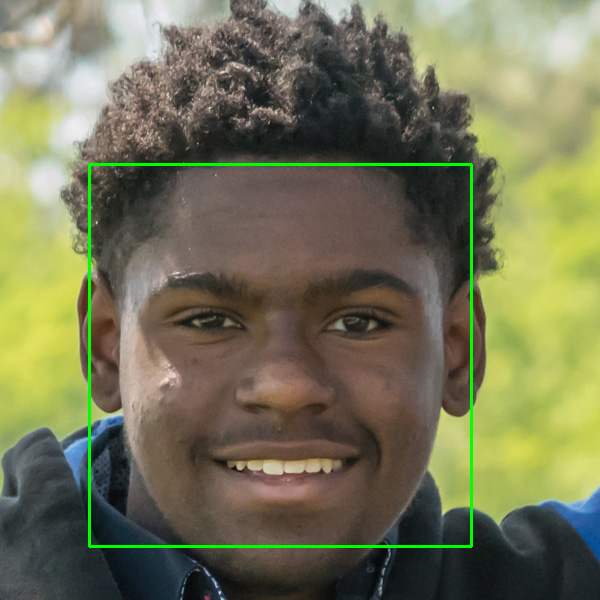

In [13]:
cv2_imshow(images[15])

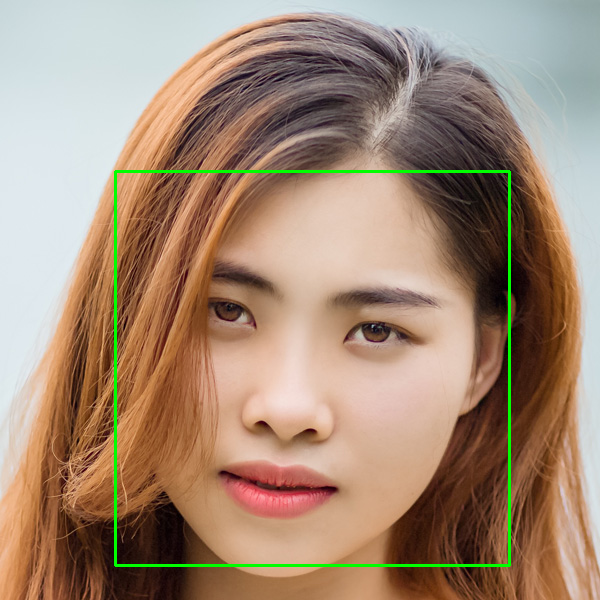

In [14]:
cv2_imshow(images[25])

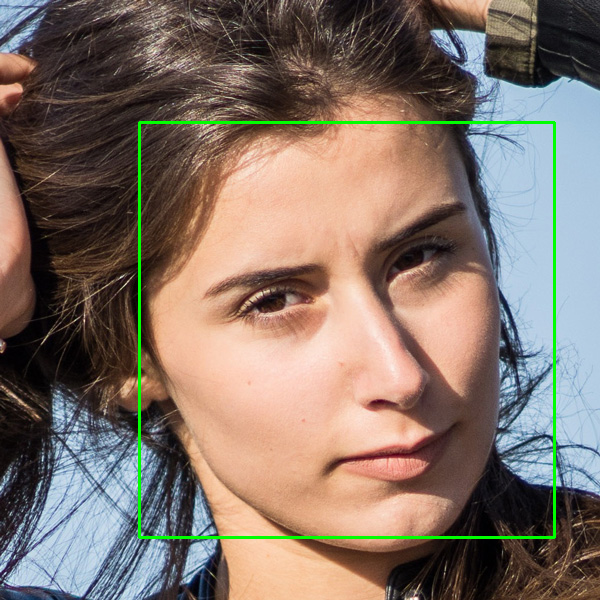

In [15]:
cv2_imshow(images[8])

In [16]:
#PART A
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization
from tensorflow.keras.layers import UpSampling2D, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras import backend as K
from PIL import Image
from numpy import asarray

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [17]:
#A. Import and read ‘images.npy’.
data = np.load('images.npy', allow_pickle=True)

In [18]:
data.shape

(409, 2)

In [19]:
#B) Split the data into Features(X) & labels(Y). Unify shape of all the images
data[0]

array([array([[[42, 37, 34],
               [56, 51, 48],
               [71, 66, 63],
               ...,
               [23, 33, 34],
               [26, 36, 37],
               [28, 38, 39]],

              [[40, 35, 32],
               [51, 46, 43],
               [64, 59, 56],
               ...,
               [27, 36, 35],
               [24, 33, 32],
               [26, 35, 34]],

              [[43, 38, 35],
               [51, 46, 43],
               [61, 56, 53],
               ...,
               [28, 30, 27],
               [33, 35, 32],
               [35, 37, 34]],

              ...,

              [[56, 47, 40],
               [57, 48, 41],
               [61, 52, 45],
               ...,
               [67, 48, 42],
               [55, 35, 28],
               [60, 40, 33]],

              [[53, 44, 37],
               [54, 45, 38],
               [57, 48, 41],
               ...,
               [59, 40, 34],
               [60, 40, 33],
               [54, 34, 27]],



In [20]:
data[0][0]

array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8)

In [21]:
data[0][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}],
  'imageWidth': 650,
  'imageHeight': 333},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}],
  'imageWidth': 650,
  'imageHeight': 333}]

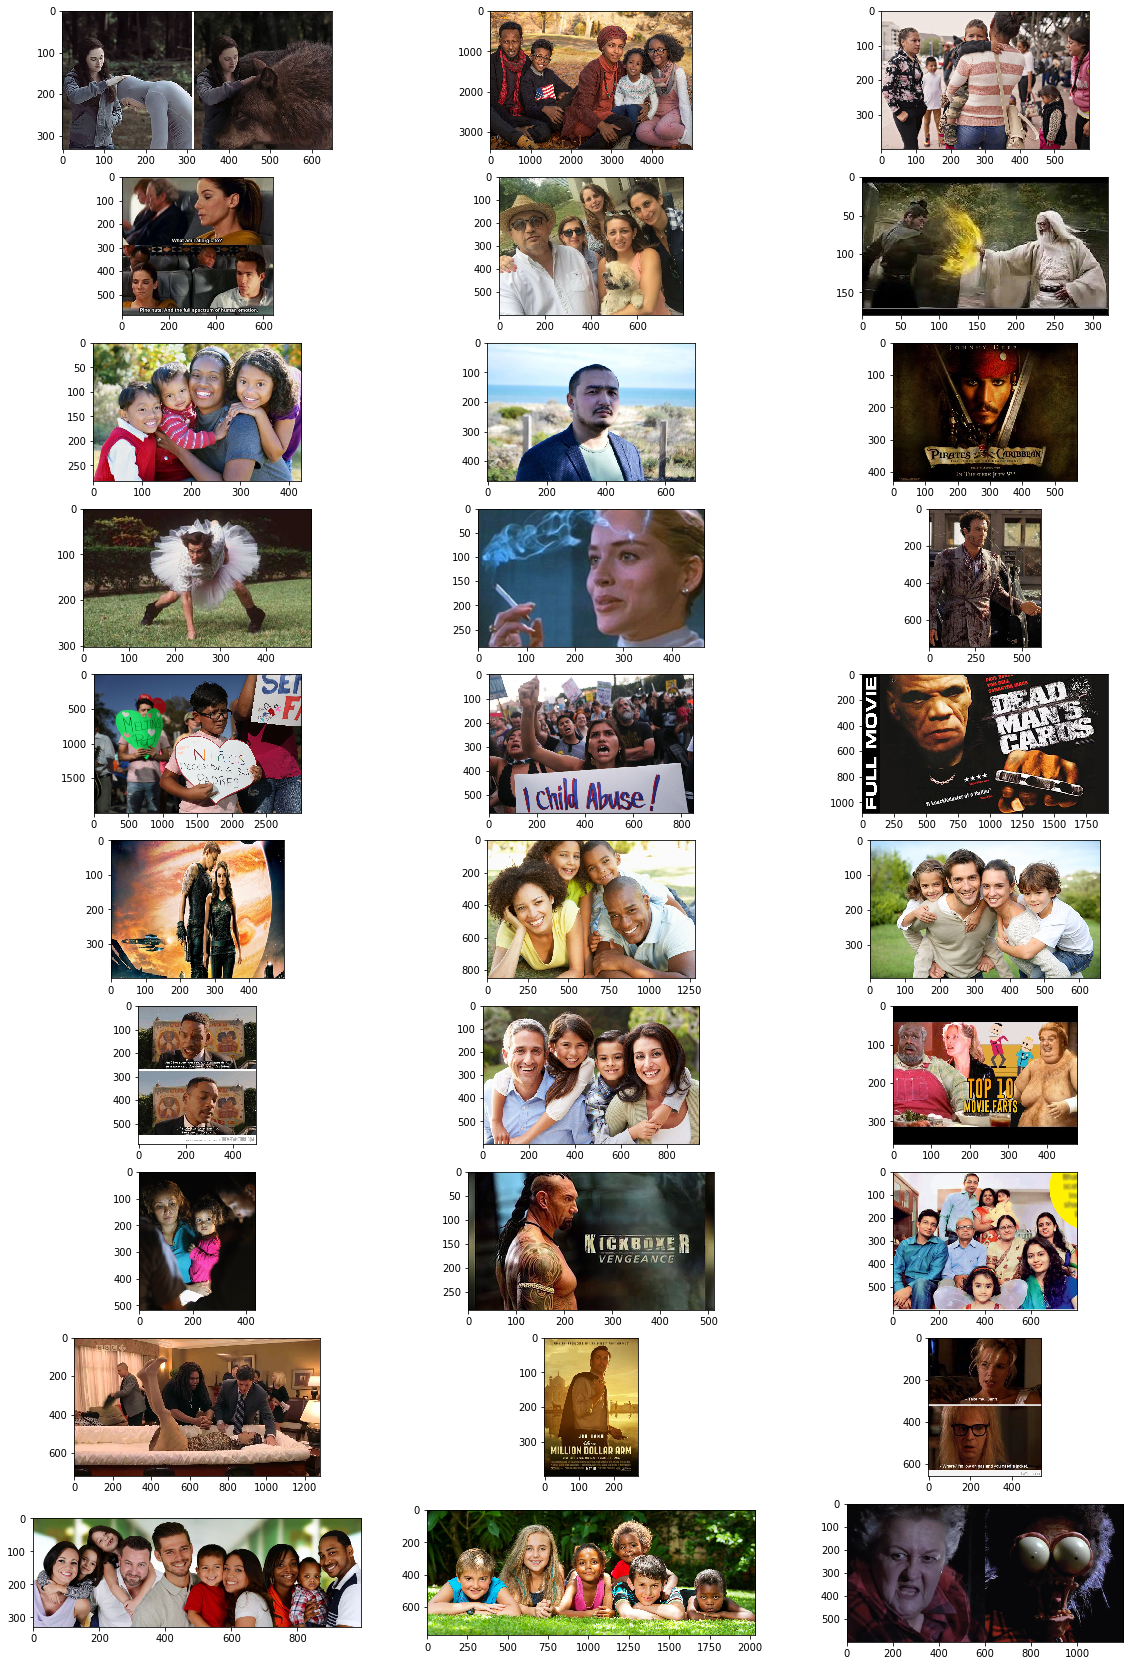

In [22]:
fi,ax = plt.subplots(10,3,figsize=(20,30))
row = 0
col = 0
index = 0
for i in range(30):
  ax[row][col].imshow(data[index][0], interpolation='nearest')
  index = index + 12
  col = col + 1
  if col > 2:
    row = row + 1
    col = 0
plt.show()

In [23]:
from tensorflow.keras.applications.mobilenet import preprocess_input

Image_height = 224
Image_width = 224

height_cells = 28
width_cells = 28

Image_size = 224

Y = np.zeros((int(data.shape[0]), Image_height, Image_width))
X = np.zeros((int(data.shape[0]),Image_height, Image_width, 3))

for index in range(data.shape[0]):
  img = data[index][0]
  img = cv2.resize(img, dsize=(Image_height, Image_width), interpolation=cv2.INTER_CUBIC)
  # assign all pixels in the first 3 channels only to the image, i.e., discard the alpha channel
  try:
    img = img[:,:,:3]
  except:
    print(f"Exception {index} Grayscale image with shape {img.shape}")
    # convert the grayscale image to color so that the number of channels are standardized to 3
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    continue
  X[index] = preprocess_input(np.array(img, dtype=np.float32))
  # Loop through the face co-ordinates and create mask out of it.
  for i in data[index][1]:
    x1 = int(i['points'][0]['x'] * Image_width)
    x2 = int(i['points'][1]['x'] * Image_width)
    y1 = int(i['points'][0]['y'] * Image_height)
    y2 = int(i['points'][1]['y'] * Image_height)
    # set all pixels within the mask co-ordinates to 1.
    Y[index][y1:y2, x1:x2] = 1

Exception 272 Grayscale image with shape (224, 224)


In [24]:
X.shape,Y.shape

((409, 224, 224, 3), (409, 224, 224))

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=9)
print(f"Shape of x_train is '{x_train.shape}' and the shape of y_train is '{y_train.shape}'")
print(f"Shape of x_test is '{x_test.shape}' and the shape of y_test is '{y_test.shape}'")

Shape of x_train is '(400, 224, 224, 3)' and the shape of y_train is '(400, 224, 224)'
Shape of x_test is '(9, 224, 224, 3)' and the shape of y_test is '(9, 224, 224)'


In [26]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.2)
print(f"Shape of x '{x_val.shape}' and the shape of y is '{y_val.shape}'")

Shape of x '(7, 224, 224, 3)' and the shape of y is '(7, 224, 224)'


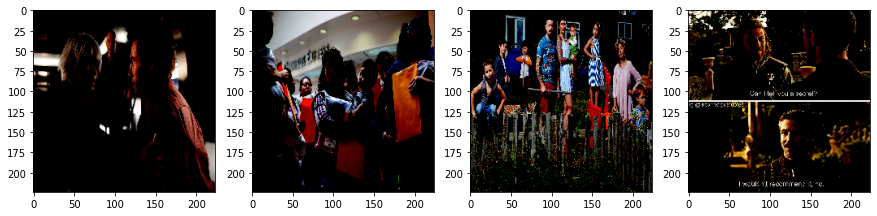

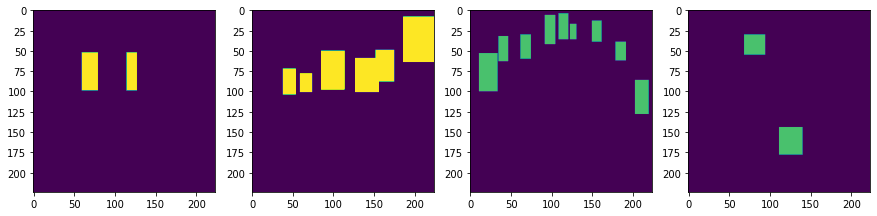

In [27]:
#D. Select random image from the train data and display original image and masked image. 
fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(x_train[10])

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(x_train[20])
imgplot.set_clim(0.0, 0.7)

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(x_train[40])
imgplot.set_clim(0.0, 1.4)

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(x_train[60])
imgplot.set_clim(0.0, 2.1)

fig = plt.figure(figsize=(15, 15))
a = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(y_train[10])

a = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(y_train[20])
imgplot.set_clim(0.0, 0.7)

a = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(y_train[40])
imgplot.set_clim(0.0, 1.4)

a = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(y_train[60])
imgplot.set_clim(0.0, 1.4)

In [28]:
%%shell
jupyter nbconvert --to html ///content/Part_A&B_of_CV2_project_.ipynb

/bin/bash: B_of_CV2_project_.ipynb: command not found
[NbConvertApp] WARNING | pattern '///content/Part_A' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equiv

CalledProcessError: ignored